# Sleep Disorder Prediction

The aim of the project is to analyze the person's lifestyles and medical variables such as age, BMI, physical activity, sleep duration, blood pressure and many more, to predict the sleep disorder and its type.

### About the Dataset
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

### Key Features of the Dataset:
- Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
- Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
- Cardiovascular Health: Examine blood pressure and heart rate measurements.
- Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

### Data Dictionary
| Column Name | Description |
| --- | --- |
|Person_ID | Unique ID assigned to each person |
|Gender|The gender of the person (Male/Female)|
|Age | Age of the person in years |
|Occupation | The occupation of the person |
|Sleep_duration | The duration of sleep of the person in hours |
|Quality_of_sleep | A subjective rating of the quality of sleep, ranging from 1 to 10|
|Physical_activity | The level of physical activity of the person (Low/Medium/High) |
|Stress Level| A subjective rating of the stress level, ranging from 1 to 10 |
|BMI_category | The BMI category of the person (Underweight/Normal/Overweight/Obesity) |
|Blood_pressure | The blood pressure of the person in mmHg |
|Heart_rate | The heart rate of the person in beats per minute |
|Daily Steps | The number of steps taken by the person per day |
|Sleep_disorder | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea) |


### Details about Sleep Disorder Column:
- None: The individual does not exhibit any specific sleep disorder.
- Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

### Import Some Library



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 1. Introduction

## 1.1. Data

In [2]:
# Read a data using Csv file (Sleep_health_and_lifestyle_dataset).
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
# Print a first five row in dataset.
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [73]:
# Print a last five row in dataset.
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


## 1.2. Evaluation Metric

**Precision** and **Recall** are universally accepted metrics to capture the performance of a model, when restricted respectively to the **predicted positive class** and the **actual positive class**. Let us denote
- **TP**: Number of true positives
- **TN**: Number of true negatives
- **FP**: Number of false positives
- **FN**: Number of false negatives

In terms of these quantities, **Precision** and **Recall** are defined as

$$\text{Precision} = \frac{TP}{TP + FP},\hspace{0.5cm} \text{Recall} = \frac{TP}{TP + FN}.$$

The **F1-score** provides a balanced measuring stick by considering the *harmonic mean* of the above two matrices.

$$F_1\text{-Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}.$$

For its equal emphasis on both *precision* and *recall*, *F1-score* is one of the most suitable metrics for evaluating the models in this project. In the dataset, we have a target variable (*Sleep Disorder Prediction *) that takes three possible values, essentially partitioning the dataset into three target classes. This can be converted to a binary partition by considering one class as the positive class and the rest two combined as the negative class. Now this positive-negative partition can be done from the perspective of each target class, producing three F1-scores. We take the unweighted average (called the **macro F1-score**) as an evaluation metric to assess the models.

# 2. Exploratory Data Analysis

## 2.1. Basic Data Exploration

In [5]:
# This line prints the shape of the DataFrame `data`.
# `data.shape` returns a tuple representing the dimensions of the DataFrame:
# (number of rows, number of columns).
print("Shape of the data: {}".format(data.shape))

Shape of the data: (374, 13)


In [6]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [65]:
# This line prints the total number of columns in the DataFrame `data`.
# `data.columns` provides an index of the column labels in the DataFrame.
# `len(data.columns)` returns the number of columns by calculating the length of the index.
print("Total number of columns: {}".format(len(data.columns)))


Total number of columns: 13


In [8]:
# This line counts the number of integer columns in the DataFrame.
# `data.dtypes` gives the data types of each column.
# `.tolist()` converts these data types into a list.
print("Number of integer columns: {}".format(data.dtypes.tolist().count(data.dtypes[0])))
print("Number of object columns: {}".format(data.dtypes.tolist().count(data.dtypes[8])))

Number of integer columns: 7
Number of object columns: 5


In [66]:
# This line identifies and counts the number of duplicate rows in the DataFrame `data`.
# `data.duplicated()` returns a boolean Series indicating whether each row is a duplicate.
# `data[data.duplicated() == True]` filters the DataFrame to include only duplicate rows.
# The filtered DataFrame is stored in the variable `duplicate`.
print("Number of duplicate rows: {}".format(len(duplicate)))


Number of duplicate rows: 0


In [10]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [67]:
# This line calculates and prints the total number of missing values in the DataFrame `data`.

print("Total number of missing values: {}".format(data.isna().sum().sum()))
print("Number of columns with missing values: {}".format(len(data.isnull().sum().tolist())-data.isnull().sum().tolist().count(0)))
print("Number of columns without missing values: {}".format(data.isnull().sum().tolist().count(0)))

Total number of missing values: 219
Number of columns with missing values: 1
Number of columns without missing values: 12


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [68]:
# Assign number of duplicate observation
print("Number of duplicate observations: {}".format(data.duplicated().sum()))

Number of duplicate observations: 0


In [14]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [69]:
# Replace nan value to None in Sleep Disorder Column (Target Veriable)
df['Sleep Disorder'] = df['Sleep Disorder'].replace(np.nan, 'None')

In [75]:
# Data Describe with all values
data.describe(include = "all").head(4).T

,count,unique,top,freq
Person ID,374.0,NaN,NaN,NaN
Gender,374,2,Male,189
Age,374.0,NaN,NaN,NaN
Occupation,374,11,Nurse,73
Sleep Duration,374.0,NaN,NaN,NaN
Quality of Sleep,374.0,NaN,NaN,NaN
Physical Activity Level,374.0,NaN,NaN,NaN
Stress Level,374.0,NaN,NaN,NaN
BMI Category,374,3,Normal,216
Blood Pressure,374,25,130/85,99


In [17]:
# check the total value count for each like none,sleep apnea,insomnia...
df['Sleep Disorder'].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

### Checking the unique values from each categorical column

In [77]:
#unique values from categorical columns
print(df.Occupation.unique())
print('\n')
print(df['BMI Category'].unique())
print('\n')
print(df['Sleep Disorder'].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


['Overweight' 'Normal' 'Obese']


['None' 'Sleep Apnea' 'Insomnia']


In [19]:
# Check a Unique value in Sleep Disorder Column.
data['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [20]:
# Check a Categorical Datatype also include 0.
cat = df.select_dtypes(include= 'O')
cat

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
0,Male,Software Engineer,Overweight,126/83,None
1,Male,Doctor,Normal,125/80,None
2,Male,Doctor,Normal,125/80,None
3,Male,Sales Representative,Obese,140/90,Sleep Apnea
4,Male,Sales Representative,Obese,140/90,Sleep Apnea
...,...,...,...,...,...
369,Female,Nurse,Overweight,140/95,Sleep Apnea
370,Female,Nurse,Overweight,140/95,Sleep Apnea
371,Female,Nurse,Overweight,140/95,Sleep Apnea
372,Female,Nurse,Overweight,140/95,Sleep Apnea


In [72]:
# Check the How Many number datatype column in this datset.
num = df.select_dtypes(include = 'number')
num

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,1,27,6.1,6,42,6,77,4200
1,2,28,6.2,6,60,8,75,10000
2,3,28,6.2,6,60,8,75,10000
3,4,28,5.9,4,30,8,85,3000
4,5,28,5.9,4,30,8,85,3000
...,...,...,...,...,...,...,...,...
369,370,59,8.1,9,75,3,68,7000
370,371,59,8.0,9,75,3,68,7000
371,372,59,8.1,9,75,3,68,7000
372,373,59,8.1,9,75,3,68,7000


In [71]:
# Blood Pressure Column using Systolic and Diastolic append method use.
Systolic = []
Diastolic = []

for i in data['Blood Pressure']:
    Systolic.append(i.split('/')[0])
    Diastolic.append(i.split('/')[1])

df['Systolic'] = Systolic
df['Diastolic'] = Diastolic
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [23]:
# Drop a Blood Pressure Column in a dataset.
df.drop(['Blood Pressure'], axis = 1, inplace = True)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [24]:
# Check a Type for Systolic and Diastolic.
df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)


In [26]:
#Check a Numerical Datatype also include number.
numerical = df.select_dtypes(include = 'number')
numerical

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
0,1,27,6.1,6,42,6,77,4200,126,83
1,2,28,6.2,6,60,8,75,10000,125,80
2,3,28,6.2,6,60,8,75,10000,125,80
3,4,28,5.9,4,30,8,85,3000,140,90
4,5,28,5.9,4,30,8,85,3000,140,90
...,...,...,...,...,...,...,...,...,...,...
369,370,59,8.1,9,75,3,68,7000,140,95
370,371,59,8.0,9,75,3,68,7000,140,95
371,372,59,8.1,9,75,3,68,7000,140,95
372,373,59,8.1,9,75,3,68,7000,140,95


## 2.2. Data Visualization


<Axes: xlabel='Sleep Disorder', ylabel='count'>

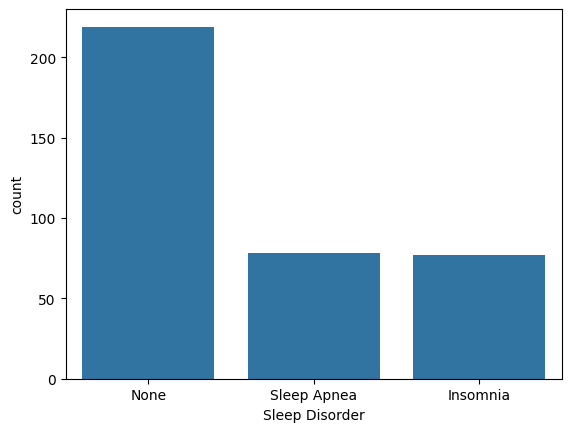

In [27]:
#Build countplot using target veraible (Sleep Disorder).
sns.countplot(x = df['Sleep Disorder'])

<Axes: xlabel='Sleep Disorder', ylabel='count'>

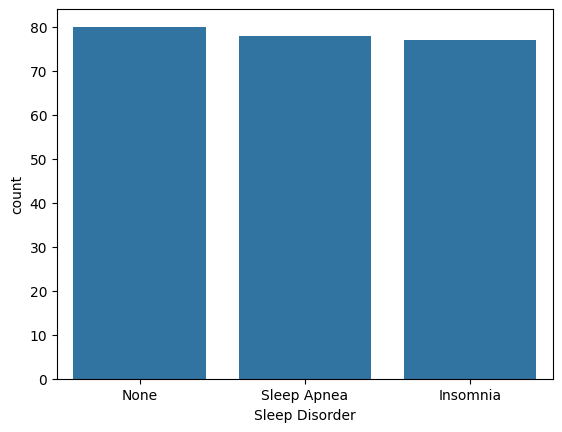

In [28]:
sleep_none = df.loc[df['Sleep Disorder'] == 'None']
sleep_apnea = df.loc[df['Sleep Disorder'] == 'Sleep Apnea']
sleep_insomnia = df.loc[df['Sleep Disorder'] == 'Insomnia']

new_sleep_none = sleep_none.sample(80)
new_df = pd.concat([new_sleep_none, sleep_apnea, sleep_insomnia])

sns.countplot(x = new_df['Sleep Disorder'])

### 2.2.1. Health and Lifestyle Factors

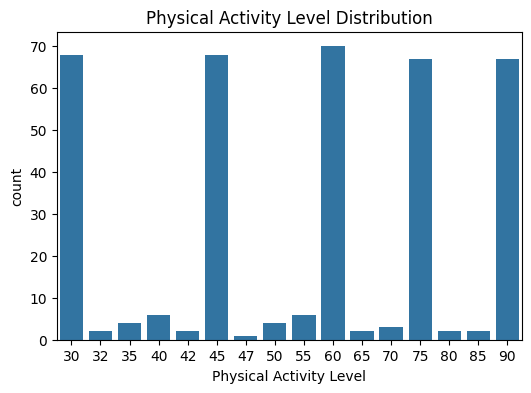

In [29]:
# Physical Activity Level
plt.figure(figsize=(6,4))
sns.countplot(x='Physical Activity Level', data=df)
plt.title('Physical Activity Level Distribution')
plt.show()

### 2.2.2. Health Metrics

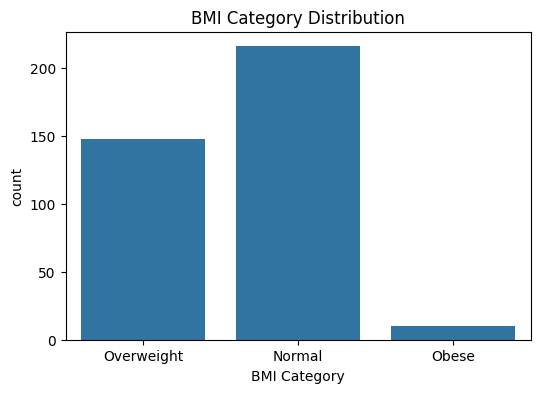

In [30]:
# BMI Category Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='BMI Category', data=df)
plt.title('BMI Category Distribution')
plt.show()

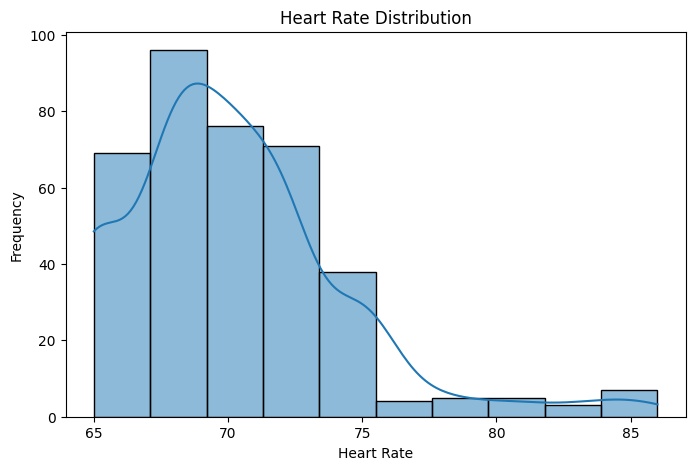

In [31]:
# Heart Rate Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Heart Rate'], bins=10, kde=True)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

### 2.2.3. Activity and Sleep Patterns

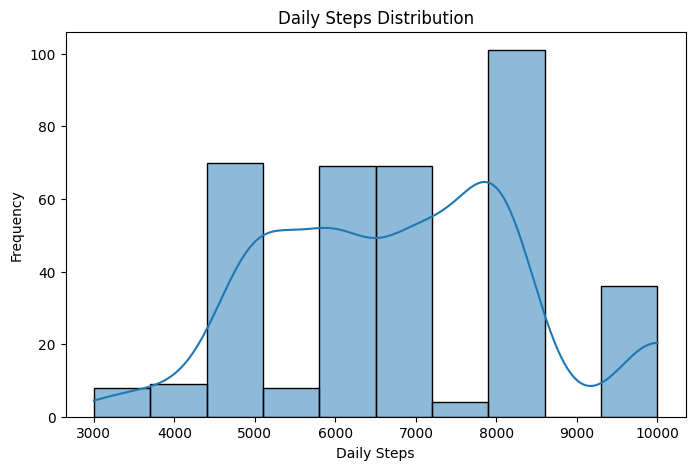

In [32]:
# Daily Steps
plt.figure(figsize=(8,5))
sns.histplot(df['Daily Steps'], bins=10, kde=True)
plt.title('Daily Steps Distribution')
plt.xlabel('Daily Steps')
plt.ylabel('Frequency')
plt.show()

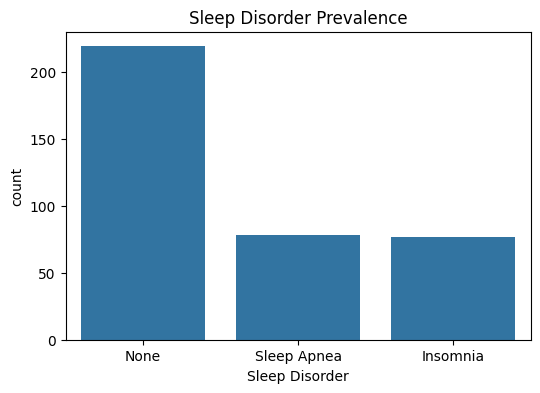

In [33]:
# Sleep Disorder Prevalence
plt.figure(figsize=(6,4))
sns.countplot(x='Sleep Disorder', data=df)
plt.title('Sleep Disorder Prevalence')
plt.show()

### 2.2.4. Relationships Between Variables

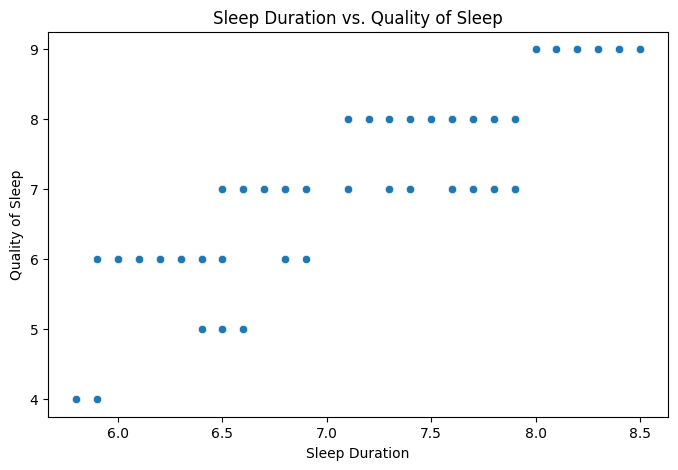

In [34]:
# Sleep Duration vs. Quality of Sleep
plt.figure(figsize=(8,5))
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=df)
plt.title('Sleep Duration vs. Quality of Sleep')
plt.show()

The EDA is divided into two phases:

Phase 1:  Understanding the data by plotting its variables

Phase 2: Understanding the correlation between the variables

#### Phase 1

<Axes: xlabel='Sleep Disorder', ylabel='count'>

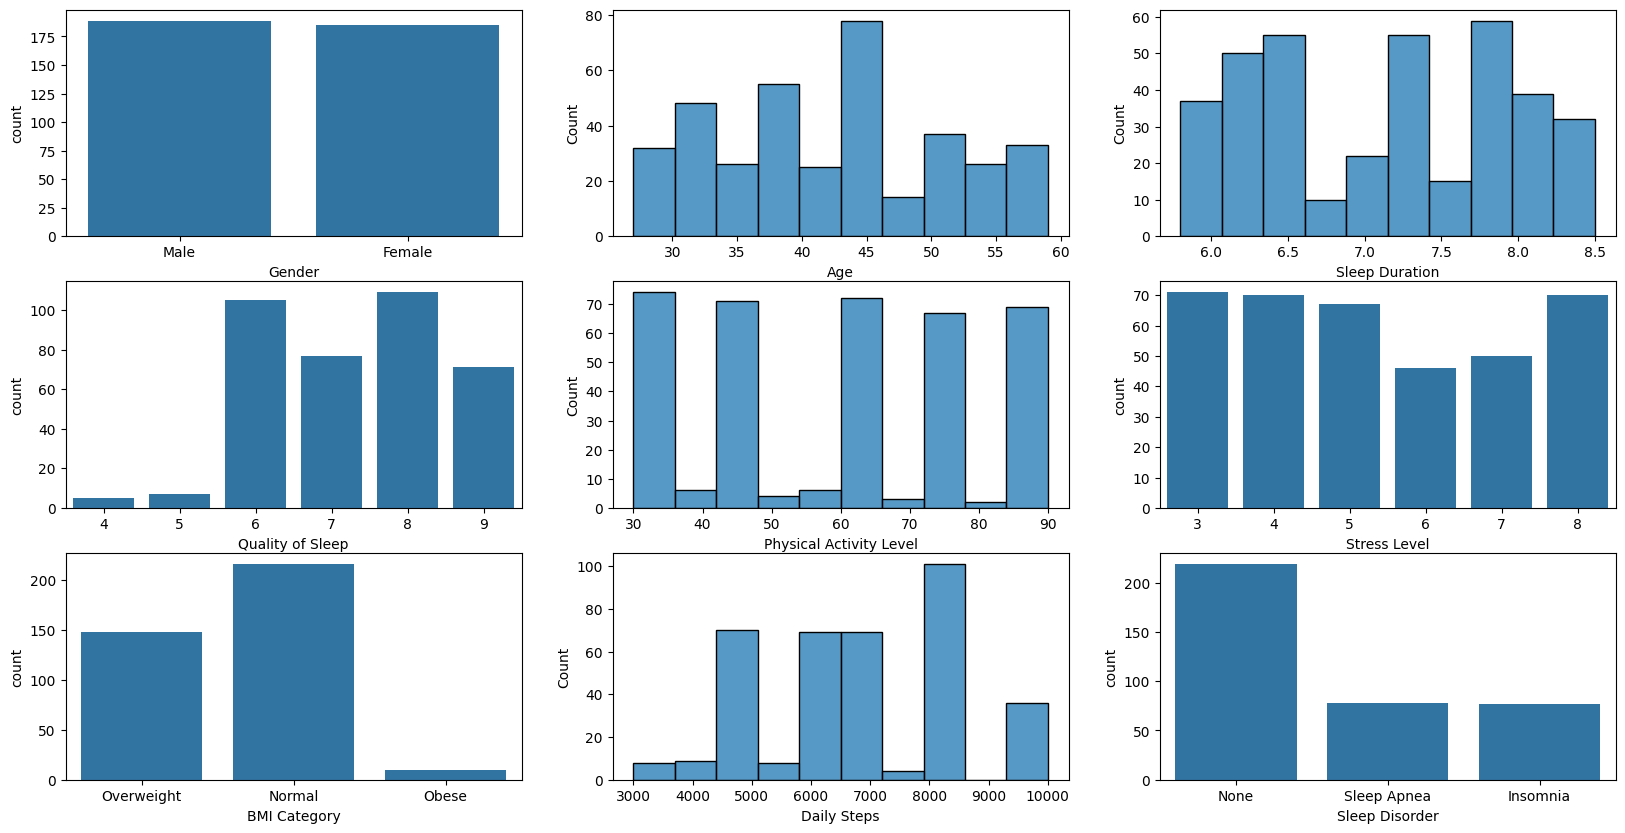

In [35]:
fig,ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x = 'Gender', data = df, ax = ax[0,0])
sns.histplot(x = 'Age', data = df, ax = ax[0,1], bins = 10)
sns.histplot(x = 'Sleep Duration', data = df, ax = ax[0,2], bins = 10)
sns.countplot(x = 'Quality of Sleep', data = df, ax = ax[1,0])
sns.histplot(x = 'Physical Activity Level', data = df, ax = ax[1,1], bins = 10)
sns.countplot(x = 'Stress Level', data = df, ax = ax[1,2])
sns.countplot(x = 'BMI Category', data = df, ax = ax[2,0])
sns.histplot(x = 'Daily Steps', data = df, ax = ax[2,1], bins = 10)
sns.countplot(x = 'Sleep Disorder', data = df, ax = ax[2,2])


The number of males and females is almost equal, out of which majority of the people have age between 30-45 years. Most of the people have sleep quality greater than 5 which means there are getting sufficient sleep. Moreover, most of the people have normal BMI whci directly relates with the distribution of sleep disorder which shows equal number of people with and without sleep disorder.

#### Phase 2

#### Gender and Sleep Disorder

Text(0.5, 1.0, 'Gender and Sleep Disorder')

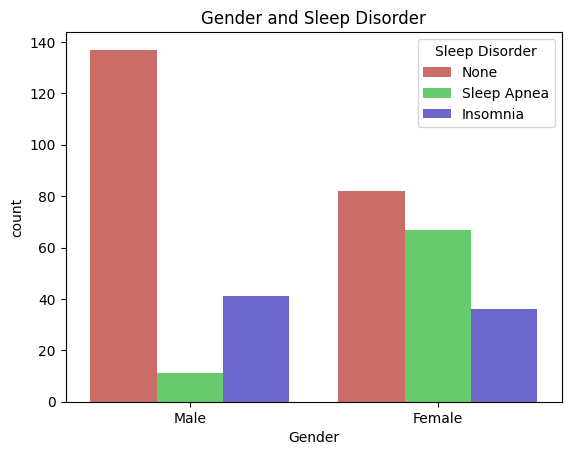

In [36]:
#Gender count plot
sns.countplot(x = 'Gender', data = df, palette = 'hls', hue = 'Sleep Disorder').set_title('Gender and Sleep Disorder')

Most of the males and females are not suffering from any sleep disorder. However females tend to have more sleep disorder as compared to males. The number of females suffering from Sleep Apnea is quite high as compared to males. But in contrast to that, greater number of males are suffering from Insomia as compared to females.

### Label encoding

In [37]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in categorical.columns:
    if i in new_df.columns:
        new_df[i] = encoder.fit_transform(new_df[i])

new_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
37,38,1,31,1,7.6,7,75,6,0,70,8000,1,120,80
98,99,0,36,10,7.1,8,60,4,0,68,7000,1,115,75
335,336,0,54,2,8.4,9,30,3,0,65,5000,1,125,80
106,107,0,37,5,6.1,6,42,6,2,77,4200,1,126,83
139,140,1,38,3,7.1,8,60,5,0,68,8000,1,130,85


# 3. Data Preprocessing

## 3.1. Missing Data Imputation

In [38]:
new_df.drop(['Person ID'], axis =1, inplace =True)
new_df.drop(['Occupation'], axis =1, inplace =True)

In [39]:
# Columns with missing values (sorted by count)
data.isna().sum()[data.isna().sum() != 0].sort_values(ascending = False)

Sleep Disorder    219
dtype: int64

In [40]:
# Rows with missing values (sorted by count)
data.T.isna().sum()[data.T.isna().sum() != 0].sort_values(ascending = False)

0      1
1      1
2      1
7      1
8      1
      ..
341    1
342    1
343    1
358    1
359    1
Length: 219, dtype: int64

In [41]:
# Converting unknown/other/na to nan
def more_missing(data):

    data = data.replace('unknown', np.nan)
    data = data.replace('other', np.nan)
    data = data.replace('na', np.nan)
    return data

In [42]:
data = more_missing(data)

### Mode imputation

In [43]:
#Mode Imputer using SimpleImputer.
def mode_imputer(data):
    data_imputed = data.copy(deep = True)
    imputer = SimpleImputer(strategy = 'most_frequent')
    data_imputed.iloc[:,:] = imputer.fit_transform(data_imputed)
    return data_imputed

### Assigning to 'unknown' category

In [44]:
# Function to assign the missing values to the 'unknown' category
def unknown_imputer(data):
    data_unknown = data.copy(deep = True)
    data_unknown = data_unknown.replace(np.nan, 'Unknown')
    return data_unknown

### Proportion-based imputation

With the goal of keeping the feature distributions same before and after imputation, we impute the missing values in a column in such a way so that the proportions of the existing unique values in the column remain roughly same as those were prior to the imputation.

In [45]:
def prop_imputer(data):
    data_prop = data.copy(deep = True)
    missing_cols = data_prop.isna().sum()[data_prop.isna().sum() != 0].index.tolist()
    for col in missing_cols:
        values_col = data_prop[col].value_counts(normalize = True).index.tolist()
        probabilities_col = data_prop[col].value_counts(normalize = True).values.tolist()
        data_prop[col] = data_prop[col].fillna(pd.Series(np.random.choice(values_col, p = probabilities_col, size = len(data))))
    return data_prop

In [78]:
data_imp = prop_imputer(data)
data_imp


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Insomnia
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Insomnia
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Insomnia
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [47]:
# Check a Column for nan values.
data.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

## 3.2. Feature Importance  

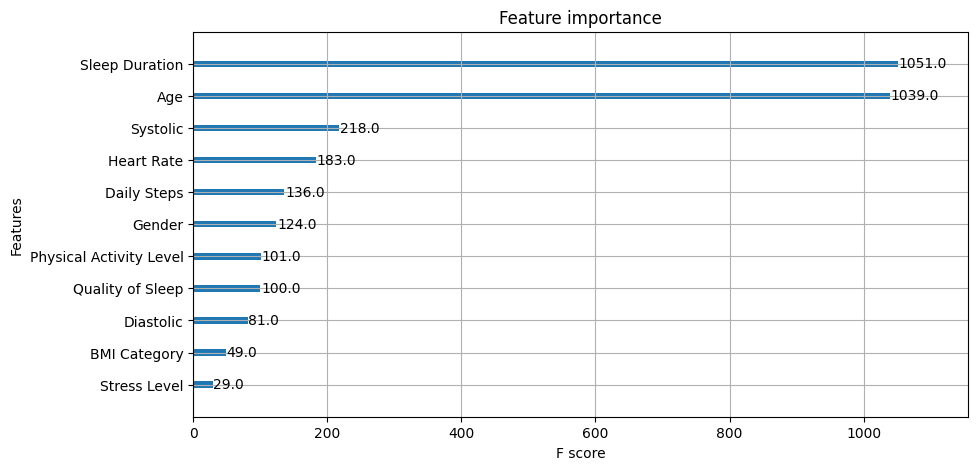

In [48]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = new_df.drop('Sleep Disorder', axis = 1)
y = new_df['Sleep Disorder']

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)

xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [49]:
sel_columns = ['Age', 'Sleep Duration', 'Systolic', 'Daily Steps', 'Heart Rate', 'Quality of Sleep', 'Physical Activity Level','Diastolic', 'Sleep Disorder']

sel_data = new_df[sel_columns]
sel_data

,Age,Sleep Duration,Systolic,Daily Steps,Heart Rate,Quality of Sleep,Physical Activity Level,Diastolic,Sleep Disorder
37,31,7.6,120,8000,70,7,75,80,1
98,36,7.1,115,7000,68,8,60,75,1
335,54,8.4,125,5000,65,9,30,80,1
106,37,6.1,126,4200,77,6,42,83,1
139,38,7.1,130,8000,68,8,60,85,1
...,...,...,...,...,...,...,...,...,...
308,52,6.6,130,6000,72,7,45,85,0
309,52,6.6,130,6000,72,7,45,85,0
310,52,6.6,130,6000,72,7,45,85,0
311,52,6.6,130,6000,72,7,45,85,0


In [50]:
#drop a column for sleep Disorder
x = sel_data.drop('Sleep Disorder', axis = 1)
y = sel_data['Sleep Disorder']

## 3.3. Train-Test Split


In [51]:
#train test split in this datset with the xtrain,xtest,ytrain,ytest...
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 34)

# 4. Model Selection (Build model)

## 4.1. Performance Evaluation

For predictiong the sleep disorder thriugh classification algorithms I will use the following algorithms:
 - Decision Tree Classifier
 - Random Forest Classifier
 - XgBoost Classifier

In [52]:
#Train All Model Like a RandomForestClassifier, XGBClassifier, DecisionTreeClassifier, SVC...
def modeller(x_train, y_train, x_test, y_test, show_train_score = None):

    # list of algorithms to be used
    algorithms = [RandomForestClassifier(), XGBClassifier(), DecisionTreeClassifier(), SVC(kernel = 'poly'), LogisticRegression()]

    # keep the training and test scores
    scores = []
    train_validator = []

    for i in algorithms:
        model_name = i
        model_name.fit(x_train, y_train)
        model_validate = model_name.predict(x_train)
        train_validator.append(accuracy_score(model_validate, y_train))

        test_perf = model_name.predict(x_test)
        scores.append(accuracy_score(test_perf, y_test))

    # create a table for each algorithms and scores
    compare_table = pd.DataFrame()
    compare_table['Algorithm'] = pd.Series(algorithms)
    compare_table['Accuracy'] = pd.Series(scores)

    if show_train_score == 'show_train':
        compare_table['Training Accuracy'] = pd.Series(train_validator)
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]
    else:
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]


table, model1, model2 = modeller(xtrain, ytrain, xtest, ytest, show_train_score = 'show_train')
table

,Algorithm,Accuracy,Training Accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.851064,0.930851
1,"XGBClassifier(base_score=None, booster=None, c...",0.851064,0.930851
2,DecisionTreeClassifier(),0.787234,0.930851
4,LogisticRegression(),0.702128,0.797872
3,SVC(kernel='poly'),0.574468,0.569149


## 4.2. XGBoost Classfier (Model Train)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.98      0.90      0.94        68
           2       0.91      0.94      0.93        66

    accuracy                           0.93       188
   macro avg       0.93      0.93      0.93       188
weighted avg       0.93      0.93      0.93       188



<Axes: >

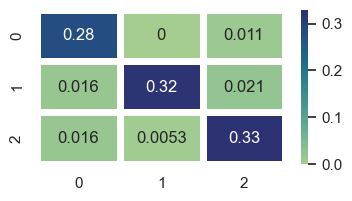

In [70]:
#Xgboost Classifier with train model and check classification report.
gb_model_train = XGBClassifier()

xgb_model_train.fit(xtrain, ytrain)

cross_validation = xgb_model_train.predict(xtrain)
print(classification_report(cross_validation, ytrain))

revealer = confusion_matrix(cross_validation, ytrain)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

## 4.3. XGBoost Classifier (Model Test)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.89      0.94      0.91        17
           2       0.90      0.90      0.90        10

    accuracy                           0.94        47
   macro avg       0.93      0.93      0.93        47
weighted avg       0.94      0.94      0.94        47



<Axes: >

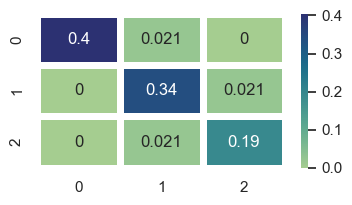

In [54]:
#Xgboost Classifier with test model and check classification report.
xgb_model_test = XGBClassifier()

xgb_model_test.fit(xtest, ytest)

cross_validation = xgb_model_test.predict(xtest)
print(classification_report(cross_validation, ytest))

revealer = confusion_matrix(cross_validation, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

## Conclusion

From the exploratory data analysis, I have concluded that the sleep orders depends upon three main factors that are gender, occupation and BMI of the patient. The males have more instance of Insomia whereas femlaes have more instances of Sleep Apnea. In addition the that people with occupation such as nurses are more prone to sleep disorders. The BMI of the patient also plays a vital role in the prediction of sleep disorders. The patients who are either Obese or overweight are more prone to sleep disorders.

Coming to the classfication models, both the models performed pretty good, however the Random Forest Classifier have excellent results with 85% accuracy.

# 5. Saved Model

In [55]:
import pickle

In [56]:
pickle.dump(xgb_model_train, open('Sleep_Health_model.pkl', "wb"))

In [57]:
pickle.dump(encoder, open('Sleep_Health_encoder.pkl', "wb"))

In [58]:
import joblib

In [59]:
imported_model = joblib.load('Sleep_Health_model.pkl')

In [60]:
sel_data


,Age,Sleep Duration,Systolic,Daily Steps,Heart Rate,Quality of Sleep,Physical Activity Level,Diastolic,Sleep Disorder
37,31,7.6,120,8000,70,7,75,80,1
98,36,7.1,115,7000,68,8,60,75,1
335,54,8.4,125,5000,65,9,30,80,1
106,37,6.1,126,4200,77,6,42,83,1
139,38,7.1,130,8000,68,8,60,85,1
...,...,...,...,...,...,...,...,...,...
308,52,6.6,130,6000,72,7,45,85,0
309,52,6.6,130,6000,72,7,45,85,0
310,52,6.6,130,6000,72,7,45,85,0
311,52,6.6,130,6000,72,7,45,85,0


In [61]:
imported_model.predict([[33,	6.0,	125,	5000,	72,	6,	30,	80]])

array([1])

In [62]:
sel_data['Sleep Disorder'].unique()

array([1, 2, 0])

In [63]:
df.iloc[[315,]]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
315,316,Female,53,Engineer,8.3,9,30,3,Normal,65,5000,Insomnia,125,80


In [64]:
# 0 = 'Insomnia'
# 1 = 'None'
# 2 = 'Sleep Apnea'

